<a href="https://colab.research.google.com/github/AdicherlaVenkataSai/MLwithPython/blob/master/3.%20NonLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we learn how to use scikit-learn for Polynomial regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, evaluate our model using test set, and finally use model to predict unknown value.

### load libraries

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### load data

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-06-12 19:34:32--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   420KB/s    in 0.2s    

2020-06-12 19:34:33 (420 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Understanding the Data
FuelConsumption.csv:
We have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source

MODELYEAR e.g. 2014

MAKE e.g. Acura

MODEL e.g. ILX

VEHICLE CLASS e.g. SUV

ENGINE SIZE e.g. 4.7

CYLINDERS e.g 6

TRANSMISSION e.g. A6

FUEL CONSUMPTION in CITY(L/100 km) e.g. 
9.9

FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9

FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2

CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

### read the data

In [4]:
df = pd.read_csv("FuelConsumption.csv")
df.shape

(1067, 13)

In [5]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [8]:
df.dtypes

MODELYEAR                     int64
MAKE                         object
MODEL                        object
VEHICLECLASS                 object
ENGINESIZE                  float64
CYLINDERS                     int64
TRANSMISSION                 object
FUELTYPE                     object
FUELCONSUMPTION_CITY        float64
FUELCONSUMPTION_HWY         float64
FUELCONSUMPTION_COMB        float64
FUELCONSUMPTION_COMB_MPG      int64
CO2EMISSIONS                  int64
dtype: object

In [9]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [10]:
df.describe(include = 'all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV 4X4,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [11]:
# selecting some features for regression

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(10)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267
9,2.4,4,9.2,212


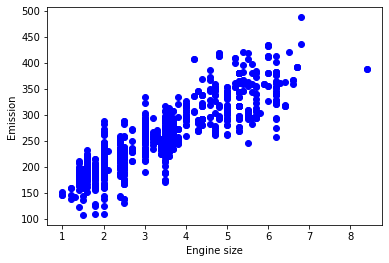

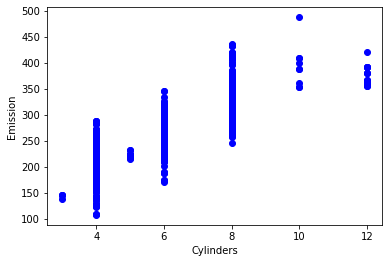

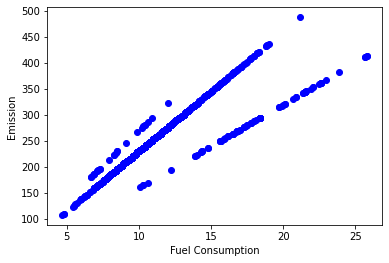

In [12]:
# plot 

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Fuel Consumption")
plt.ylabel("Emission")
plt.show()



### Creating train test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [13]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

train.shape, test.shape

((840, 4), (227, 4))

In [14]:
train.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
6,3.5,6,10.1,232


# Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):

𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2 
Now, the question is: how we can fit our data on this equation while we have only x values, such as Engine Size? Well, we can create a few additional features: 1,  𝑥 , and  𝑥2 .

PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

In [16]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = pf(degree = 2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24]])

fit_transform takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

𝑣1𝑣2⋮𝑣𝑛   ⟶   [1[1⋮[1𝑣1𝑣2⋮𝑣𝑛𝑣21]𝑣22]⋮𝑣2𝑛] 
in our example

2.2.41.5⋮   ⟶   [1[1[1⋮2.2.41.5⋮4.]5.76]2.25]⋮ 
It looks like feature sets for multiple linear regression analysis, right? Yes. It Does. Indeed, Polynomial regression is a special case of linear regression, with the main idea of how do you select your features. Just consider replacing the  𝑥  with  𝑥1 ,  𝑥21  with  𝑥2 , and so on. Then the degree 2 equation would be turn into:

𝑦=𝑏+𝜃1𝑥1+𝜃2𝑥2 
Now, we can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. So, you can use the same mechanism as linear regression to solve such a problems.

so we can use LinearRegression() function to solve it:

In [17]:
clf = lm.LinearRegression()
train_y = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         48.67117056 -1.2500919 ]]
Intercept:  [110.15075957]


As mentioned before, Coefficient and Intercept , are the parameters of the fit curvy line. Given that it is a typical multiple linear regression, with 3 parameters, and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. Lets plot it:

Text(0, 0.5, 'Emission')

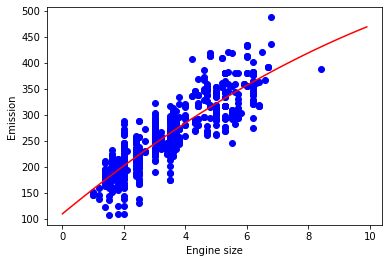

In [20]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
# y = theta0 + theta1 * x + theta2 * x**2
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evalutaion

In [22]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: 1.00


### Practise

Coefficients:  [[ 0.         51.9632618  -1.66906858]]
Intercept:  [16.69596042]
Mean absolute error: 27.40
Residual sum of squares (MSE): 1155.85
R2-score: 0.59


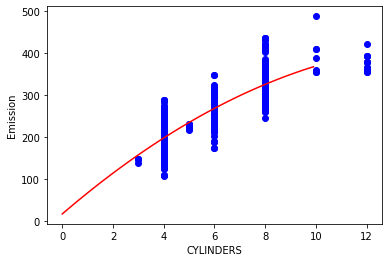

In [28]:
from sklearn.preprocessing import PolynomialFeatures as pf1
from sklearn import linear_model as lm1

train_x1 = np.asanyarray(train[['CYLINDERS']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])

test_x1 = np.asanyarray(test[['CYLINDERS']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])

poly1 = pf1(degree = 2)
train_x_poly1 = poly1.fit_transform(train_x1)
train_x_poly1

clf1 = lm1.LinearRegression()
train_y1 = clf1.fit(train_x_poly1, train_y1)

# The coefficients
print ('Coefficients: ', clf1.coef_)
print ('Intercept: ',clf1.intercept_)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
XX1 = np.arange(0.0, 10.0, 0.1)
yy1 = clf1.intercept_[0]+ clf1.coef_[0][1]*XX1+ clf1.coef_[0][2]*np.power(XX1, 2)
# y = theta0 + theta1 * x + theta2 * x**2
plt.plot(XX1, yy1, '-r' )
plt.xlabel("CYLINDERS")
plt.ylabel("Emission")

test_x_poly1 = poly1.fit_transform(test_x1)
test_y_1 = clf1.predict(test_x_poly1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1 , test_y1) )

Coefficients:  [[ 0.         39.20237892 -0.86602588]]
Intercept:  [-71.5878162]
Mean absolute error: 10.89
Residual sum of squares (MSE): 401.73
R2-score: 0.86


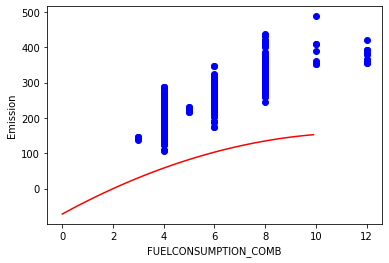

In [30]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn import linear_model 

train_x2 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])

test_x2 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])

poly2 = PolynomialFeatures(degree = 2)
train_x_poly2 = poly2.fit_transform(train_x2)
train_x_poly2

clf2 = linear_model.LinearRegression()
train_y2 = clf2.fit(train_x_poly2, train_y2)

# The coefficients
print ('Coefficients: ', clf2.coef_)
print ('Intercept: ',clf2.intercept_)

plt.scatter(train.CYLINDERS, train.CO2EMISSIONS,  color='blue')
XX2 = np.arange(0.0, 10.0, 0.1)
yy2 = clf2.intercept_[0]+ clf2.coef_[0][1]*XX2+ clf1.coef_[0][2]*np.power(XX2, 2)
# y = theta0 + theta1 * x + theta2 * x**2
plt.plot(XX2, yy2, '-r' )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

test_x_poly2 = poly2.fit_transform(test_x2)
test_y_2 = clf2.predict(test_x_poly2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_2 , test_y2) )

### Practise

Coefficients:  [[ 0.         29.89868967  4.02323407 -0.44665803]]
Intercept:  [129.73684076]
Mean absolute error: 23.38
Residual sum of squares (MSE): 952.21
R2-score: 0.66


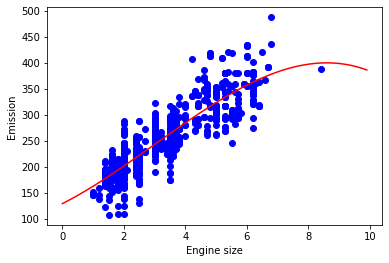

In [32]:
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn import linear_model as lm

train_x3 = np.asanyarray(train[['ENGINESIZE']])
train_y3 = np.asanyarray(train[['CO2EMISSIONS']])

test_x3 = np.asanyarray(test[['ENGINESIZE']])
test_y3 = np.asanyarray(test[['CO2EMISSIONS']])


poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x3)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y3)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX3 = np.arange(0.0, 10.0, 0.1)
yy3 = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX3, 2) + clf3.coef_[0][3]*np.power(XX3, 3)
plt.plot(XX3, yy3, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x3)
test_y3_3 = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_3 - test_y3)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_3 - test_y3) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_3 , test_y3) )

